## Import Libraries

In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
tf.__version__

'2.4.1'

## Import Dataset

In [37]:
# Define some constant parameters
IMG_WIDTH = 30
IMG_HEIGHT = 30
EPOCHS = 50

In [38]:
# Create an Image Generator
img_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

# Create train dataset with ImageGenerator from local directory
train_ds = img_gen.flow_from_directory(
    directory='Train-Data/',
    subset='training',
    shuffle=True,
    seed=42,
    color_mode='grayscale',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    interpolation='bilinear',
    batch_size=48)

# Create validation dataset with ImageGenerator from local directory
val_ds = img_gen.flow_from_directory(
    directory='Train-Data/',
    subset='validation',
    shuffle=True,
    seed=42,
    color_mode='grayscale',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    interpolation='bilinear',
    batch_size=16)

Found 56529 images belonging to 36 classes.
Found 14116 images belonging to 36 classes.


In [39]:
print('Shape of one batch of data:\n', train_ds[0][0].shape, '\n')
print('Shape of one batch of labels:\n', train_ds[0][1].shape, '\n')

Shape of one batch of data:
 (48, 30, 30, 1) 

Shape of one batch of labels:
 (48, 36) 



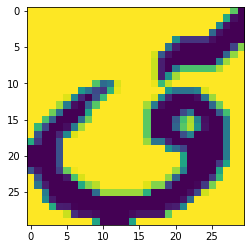

In [53]:
# Show one sample of data
img = train_ds[0][0][4]
plt.imshow(img)

## Create Model

In [54]:
# Define CNN + FullyConnectedNetwork Model
OCR_model = keras.models.Sequential([
    keras.layers.Conv2D(64, 5, input_shape=(30, 30, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128, 5),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(),
    keras.layers.ReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(250),
    keras.layers.ReLU(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36),
    keras.layers.Softmax()
])

In [55]:
OCR_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        1664      
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
re_lu_6 (ReLU)               (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 128)         204928    
_________________________________________________________________
batch_normalization_9 (Batch (None, 9, 9, 128)        

In [57]:
# Compile Model
OCR_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics='accuracy')

## Training Model

In [58]:
# Fit model to train data
OCR_model.fit(train_ds,
    epochs=20,
    validation_data=val_ds,
    # Early Stopping prevents from overfitting
    callbacks=keras.callbacks.EarlyStopping(patience=3))

1178/1178 [==============================] - 877s 741ms/step - loss: 0.6810 - accuracy: 0.7932 - val_loss: 0.2684 - val_accuracy: 0.9139


## Evaluation Model

In [67]:
# Create test dataset from images saved in 'Test-Data' folder
img_gen_ = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_ds = img_gen_.flow_from_directory(
    directory='Test-Data/',
    shuffle=True,
    seed=42,
    color_mode='grayscale',
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    interpolation='bilinear',
    batch_size=48)

# Evaluation accuracy of model
OCR_model.evaluate(test_ds)

Found 17706 images belonging to 36 classes.
369/369 [==============================] - 3s 9ms/step - loss: 0.2835 - accuracy: 0.9126


[0.2834565341472626, 0.9126284718513489]

In [76]:
# Predict one sample of data
OCR_model.predict(test_ds[0][0][0].reshape((1, 30, 30, 1))).round(3)

array([[0.   , 0.   , 0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]],
      dtype=float32)